In [1]:
#importing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('pp-2021_cleaned.csv')
df.head()

,price,datetime,date,post_code,area,region
0,"477,000",10/05/2021 00:00,10/05/2021,BN16 2PQ,WEST SUSSEX,South East
1,"370,000",06/05/2021 00:00,06/05/2021,BN2 4HZ,BRIGHTON AND HOVE,South East
2,"462,500",28/04/2021 00:00,28/04/2021,BN2 0GP,BRIGHTON AND HOVE,South East
3,"433,000",06/08/2021 00:00,06/08/2021,BN8 4LS,EAST SUSSEX,South East
4,"676,000",05/08/2021 00:00,05/08/2021,BN1 6NB,BRIGHTON AND HOVE,South East


In [2]:
df['date']=pd.to_datetime(df.date, dayfirst=True, format="%d/%m/%Y") 
df_index=df.copy()
df_index.set_index('date',inplace=True)
df_index.head()

,price,datetime,post_code,area,region
date,,,,,
2021-05-10,"477,000",10/05/2021 00:00,BN16 2PQ,WEST SUSSEX,South East
2021-05-06,"370,000",06/05/2021 00:00,BN2 4HZ,BRIGHTON AND HOVE,South East
2021-04-28,"462,500",28/04/2021 00:00,BN2 0GP,BRIGHTON AND HOVE,South East
2021-08-06,"433,000",06/08/2021 00:00,BN8 4LS,EAST SUSSEX,South East
2021-08-05,"676,000",05/08/2021 00:00,BN1 6NB,BRIGHTON AND HOVE,South East


In [9]:
house_prices=df_index.resample('d').sum()
house_prices.head()

,price,datetime,post_code,area,region
date,,,,,
2021-01-01,"375,000 30,000 180,000 74,375 50,000 450...",01/01/2021 00:0001/01/2021 00:0001/01/2021 00:...,CM7 5NBLN12 1NBPO2 9JTRG1 3FYME9 7SPHA3 5LEBH2...,ESSEXLINCOLNSHIREPORTSMOUTHREADINGKENTGREATER ...,AngliaEast MidlandsSouth EastSouth EastSouth E...
2021-01-02,"240,000 130,000 89,000 205,000 180,000 8...",02/01/2021 00:0002/01/2021 00:0002/01/2021 00:...,TW12 3YGGL3 4BLCV4 9NRRG21 4PENG7 1RUBL1 8PDCV...,GREATER LONDONGLOUCESTERSHIREWEST MIDLANDSHAMP...,LondonSouth WestWest MidlandsSouth EastEast Mi...
2021-01-03,"555,000 237,000 140,000 282,000 387,000 ...",03/01/2021 00:0003/01/2021 00:0003/01/2021 00:...,SW4 6NPSN25 4ZABB2 7JEME7 2JHWD25 7EWSO21 2EPB...,GREATER LONDONSWINDONLANCASHIREMEDWAYHERTFORDS...,LondonSouth WestNorth WestSouth EastAngliaSout...
2021-01-04,"480,000 485,555 569,950 340,316 227,500 ...",04/01/2021 00:0004/01/2021 00:0004/01/2021 00:...,CR8 2JBTA19 0SAHG3 3FASO31 8NDPO30 1DJS43 3GPS...,GREATER LONDONSOMERSETNORTH YORKSHIREHAMPSHIRE...,LondonSouth WestYorkshire and HumberSouth East...
2021-01-05,"285,000 535,000 405,000 149,000 385,000 ...",05/01/2021 00:0005/01/2021 00:0005/01/2021 00:...,E16 1NASW16 1LZME20 7GYCT11 9QDNW9 0FLSA19 6UB...,GREATER LONDONGREATER LONDONKENTKENTGREATER LO...,LondonLondonSouth EastSouth EastLondonWalesLon...


In [7]:
print(df.dtypes)

 price               object
datetime             object
date         datetime64[ns]
post_code            object
area                 object
region               object
dtype: object


AttributeError: 'DataFrame' object has no attribute 'price'

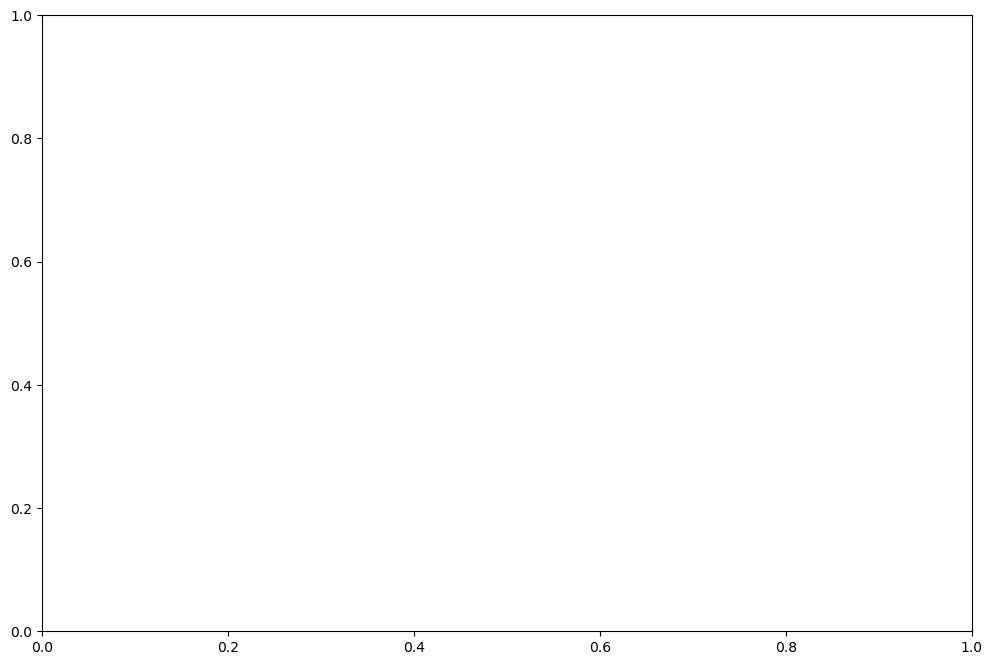

In [13]:
fig, ax = plt.subplots(figsize=(12,8)) 
ax.plot(house_prices.index,house_prices.price) 
ax.set_title('House prices per day 2021')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
house_prices.price.resample('w').sum().plot(ax=ax[0,0]) # group by week
house_prices.price.resample('m').sum().plot(ax=ax[0,1]) # group by month
house_prices.price.resample('q').sum().plot(ax=ax[1,0]) # group by quarter
ax[0,0].set_title('By Week')
ax[0,1].set_title('By Month')
ax[1,0].set_title('By Quarter')
fig.tight_layout()
plt.show()

In [ ]:
houseprice_by_month=house_prices.resample('m').sum() # creating a dataframe which shows the total house price by month

data_points=np.linspace(0,len(houseprice_by_month),num=len(houseprice_by_month)) # list of data points as long as dataframe

line_coef = np.polyfit(data_points,houseprice_by_month.price,1) # Identifying the trendline of the monthly price

polynomial = np.poly1d(line_coef) # Function that for any independent variable given, will return the dependent variable

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(data_points,houseprice_by_month.price)
ax.plot(data_points, polynomial(data_points),c='red')
ax.set_title('House price per month in 2021')
ax.set_ylabel('Price')
ax.set_xlabel('Month')
plt.show()